# To Do
- Add more text to describe what is happening

# Classical Solution to the Ising Model

This notebook provides a classical solution to the Ising Model. We use the simple approach of exact diagonalization since we are assuming $N$ is relatively small.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Creating operators for the model
Sx = np.array([[0,1],
               [1,0]])
Sz = np.array([[1,0],
               [0,-1]])
Id = np.array([[1,0],
               [0,1]])

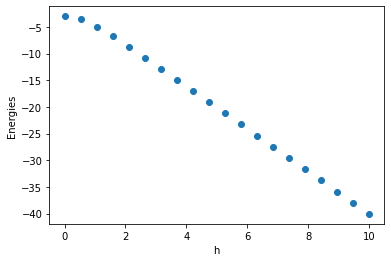

In [51]:
# functions for creating the general operators for N sites

def ZZ(N):
    num_states = 2**N
    ZZ_diag = np.zeros(num_states, dtype = int)
    for col in range(num_states):
        binary_list = state_list(col, N)
        val = 0
        for j in range(N-1):
            val += (-1)**(binary_list[j] + binary_list[j+1])
        ZZ_diag[col] = val
    ZZ = np.diag(ZZ_diag)
    return ZZ


def X(N):    
    num_states = 2**N
    X = np.zeros( (num_states, num_states), dtype = int) # initializing the empty array
    
    for i in range(0,N): # N  not N-1. N because we iterate through all values
        operator_list = [Id]* i + [Sx] + [Id]*(N-1-i) # list of the operators that we will iterate through when we Kronecker
        full_operator = operator_list[0] # starting from the begining
        for operator in operator_list[1:]: 
            # iterating through all the elements after the first and applying kronecker product
            full_operator = np.kron(full_operator, operator) 
        X = X + full_operator
    return X


def Hamiltonian(h):
    return -ZZ(N) - h*X(N)


def state_list(i,N): # takes i, the state index, and N, the number of sites, to create a list representation in binary
    binary_list = np.zeros(N, dtype = int)
    for j in range(N):
        binary_list[j] = (i//2**(N-1-j)) % 2
    return binary_list


def Ising_Energies(N, num_vals = 20):
    # Values of g to use in calculating/plotting
    h_vals = np.linspace(0, 10, num_vals)

    # Create an empty table to store the results:
    ground_state_E = np.zeros(np.size(h_vals))

    for index, h in enumerate(h_vals): 
        H = Hamiltonian(h)
        e, v = np.linalg.eigh(H) # exact diagonalization
        ground_state_E[index] = np.amin(e)
        

    f, a = plt.subplots()
    a.scatter(h_vals, ground_state_E)
    a.set_xlabel('h');
    a.set_ylabel('Energies');  
    return


Ising_Energies(4)

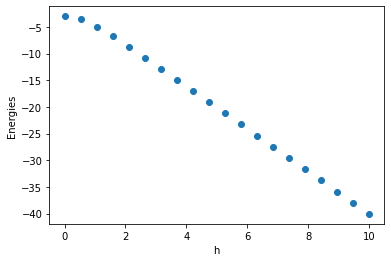

In [50]:
# Some hard-coded constants

N = 4 #number of sites
Ising_Energies(N)

## References

This notebook has code taken from the in-class assignments from Perimeter Summer School 2020, Numerical Methods Lectures from Prof. Aaron Szasz

